In [162]:
#Dependicies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [163]:
#calling all CSV file
maang_data_path = "C:/Users/pasin/OneDrive/Desktop/ALHW/Group-5-bland-repo/resources/Maang stock prices/combined_file.csv"
doge_data_path = "C:/Users/pasin/OneDrive/Desktop/ALHW/Group-5-bland-repo/resources/DOGE-USD.csv"
btc_data_path = "C:/Users/pasin/OneDrive/Desktop/ALHW/Group-5-bland-repo/resources/BTC-USD.csv"


In [164]:
#Read MAANG and Crypto files
maang_df = pd.read_csv(maang_data_path)
btc_df = pd.read_csv(btc_data_path)
doge_df = pd.read_csv(doge_data_path)

#Remove additional header rows from MAANG file
value_to_remove = 'Name'
maang_df = maang_df[maang_df['Name'] != value_to_remove]
maang_df.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AMZN,7/30/18,91.366501,91.474998,88.301003,88.960999,88.960999,131246000
1,AMZN,7/31/18,89.324501,90.091499,86.966003,88.872002,88.872002,114774000
2,AMZN,8/1/18,89.199997,89.921997,88.801003,89.858498,89.858498,83062000
3,AMZN,8/2/18,89.438499,91.828003,89.300003,91.716499,91.716499,87094000
4,AMZN,8/3/18,91.887001,92.050003,91.074997,91.164497,91.164497,69210000


In [165]:
#Reformat BTC file to align with MAANG file
btc_name = "BTC"
btc_df['Name'] = btc_name
column_order = ['Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
btc_df = btc_df.reindex(columns=column_order)
btc_df.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,BTC,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,BTC,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,BTC,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,BTC,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,BTC,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [166]:
#Reformat DOGE file to align with MAANG file
doge_name = "DOGE"
doge_df['Name'] = doge_name
column_order = ['Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
doge_df = doge_df.reindex(columns=column_order)
doge_df.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,DOGE,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,DOGE,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,DOGE,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,DOGE,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,DOGE,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [167]:
#Combine maang, btc, and doge dataframes into one
combined = [maang_df, btc_df, doge_df]
combined_df = pd.concat(combined)
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df

#Drop NA values
clean_combined_df = combined_df.dropna()
clean_combined_df

C:\Users\pasin\AppData\Local\Temp\ipykernel_8220\3337925927.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Date'] = pd.to_datetime(combined_df['Date'])


,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AMZN,2018-07-30,91.366501,91.474998,88.301003,88.960999,88.960999,131246000
1,AMZN,2018-07-31,89.324501,90.091499,86.966003,88.872002,88.872002,114774000
2,AMZN,2018-08-01,89.199997,89.921997,88.801003,89.858498,89.858498,83062000
3,AMZN,2018-08-02,89.438499,91.828003,89.300003,91.716499,91.716499,87094000
4,AMZN,2018-08-03,91.887001,92.050003,91.074997,91.164497,91.164497,69210000
...,...,...,...,...,...,...,...,...
2089,DOGE,2023-07-30,0.08019,0.080439,0.077039,0.078061,0.078061,436209339.0
2090,DOGE,2023-07-31,0.078063,0.079656,0.0771,0.077818,0.077818,346973531.0
2091,DOGE,2023-08-01,0.077824,0.078168,0.076043,0.078042,0.078042,369078156.0
2092,DOGE,2023-08-02,0.078038,0.078195,0.0741,0.074213,0.074213,364508311.0


In [168]:
tickers = ['AMZN', 'META', 'NVDA', 'MSFT', 'GOOG', 'NFLX', 'AAPL', 'BTC', 'DOGE']

In [169]:
# Convert 'Open' and 'Close' columns to numeric data types
clean_combined_df['Open'] = pd.to_numeric(clean_combined_df['Open'], errors='coerce')
clean_combined_df['Close'] = pd.to_numeric(clean_combined_df['Close'], errors='coerce')


C:\Users\pasin\AppData\Local\Temp\ipykernel_8220\3668520166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['Open'] = pd.to_numeric(clean_combined_df['Open'], errors='coerce')
C:\Users\pasin\AppData\Local\Temp\ipykernel_8220\3668520166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['Close'] = pd.to_numeric(clean_combined_df['Close'], errors='coerce')


In [170]:
# Define the date range
start_date = '2020-01-07'
end_date = '2020-01-10'

In [171]:
# Filter data within the specified date range
filtered_df = clean_combined_df.loc[(clean_combined_df['Date'] >= start_date) & (clean_combined_df['Date'] <= end_date)]

In [172]:
grouped = filtered_df.groupby('Name')

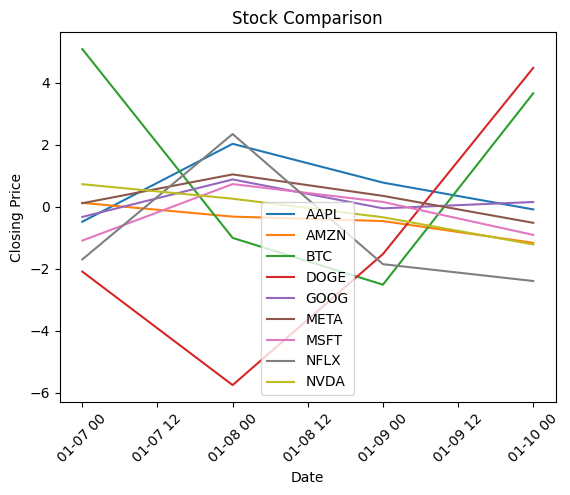

In [173]:
for stock, group in grouped:
    # Calculate the change in prices
    change_in_prices = ((group['Close'] - group['Open']) / group['Open']) *100
    plt.plot(group['Date'], change_in_prices, label=stock)
    plt.xlabel('Date')

plt.ylabel('Closing Price')
plt.title('Stock Comparison')
plt.legend()
plt.xticks(rotation=45)


plt.show()